In [119]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [120]:
FinalMerge = pd.read_excel('../2progs/Excel_Files/C3_FinalMerge.xlsx',sheet_name='Sheet1',index_col = 0)

In [121]:
#converting to floats
FinalMerge['number_dwellings'] = FinalMerge['number_dwellings'].astype(float)
FinalMerge['number_habitablerooms'] = FinalMerge['number_habitablerooms'].astype(float)
FinalMerge['share_toilet_Yes'] = FinalMerge['share_toilet_Yes'].astype(float)
FinalMerge['own_radio_Yes'] = FinalMerge['own_radio_Yes'].astype(float)
FinalMerge['own_television_Yes'] = FinalMerge['own_television_Yes'].astype(float)
FinalMerge['own_satelitedish_Yes'] = FinalMerge['own_satelitedish_Yes'].astype(float)
FinalMerge['own_smartphone_Yes'] = FinalMerge['own_smartphone_Yes'].astype(float)
FinalMerge['own_refrigerator_Yes'] = FinalMerge['own_refrigerator_Yes'].astype(float)
FinalMerge['own_table_Yes'] = FinalMerge['own_table_Yes'].astype(float)
FinalMerge['own_bed_Yes'] = FinalMerge['own_bed_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_mosquitonet_Yes'] = FinalMerge['own_mosquitonet_Yes'].astype(float)
FinalMerge['own_mattress_Yes'] = FinalMerge['own_mattress_Yes'].astype(float)
FinalMerge['own_fan_Yes'] = FinalMerge['own_fan_Yes'].astype(float)
FinalMerge['own_bicycle_Yes'] = FinalMerge['own_bicycle_Yes'].astype(float)
FinalMerge['own_motorcycle_Yes'] = FinalMerge['own_motorcycle_Yes'].astype(float)
FinalMerge['own_generator_Yes'] = FinalMerge['own_generator_Yes'].astype(float)
FinalMerge['own_solarpanels_Yes'] = FinalMerge['own_solarpanels_Yes'].astype(float)
FinalMerge['own_kerosenestove_Yes'] = FinalMerge['own_kerosenestove_Yes'].astype(float)
FinalMerge['own_charcoaljiko_Yes'] = FinalMerge['own_charcoaljiko_Yes'].astype(float)
FinalMerge['own_wheelbarrow_Yes'] = FinalMerge['own_wheelbarrow_Yes'].astype(float)
FinalMerge['own_ironfencing_Yes'] = FinalMerge['own_ironfencing_Yes'].astype(float)
FinalMerge['own_farmanimals_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['hh_purchasedfood7d_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)
FinalMerge['foodwasfree_Yes'] = FinalMerge['own_farmanimals_Yes'].astype(float)

#for own_car variable, all of them were a no, so they were dropped

#Rest of float variables for the unrestricted dataset 
FinalMerge['headFemale'] = FinalMerge['headFemale'].astype(float)
FinalMerge['size'] = FinalMerge['size'].astype(float)
FinalMerge['shareWithEarlyChildhood'] = FinalMerge['shareWithEarlyChildhood'].astype(float)
FinalMerge['foodspent_localcurrecny'] = FinalMerge['foodspent_localcurrecny'].astype(float)
FinalMerge['familysize1'] = FinalMerge['familysize1'].astype(float)
FinalMerge['familysize2'] = FinalMerge['familysize2'].astype(float)
FinalMerge['familysize3'] = FinalMerge['familysize3'].astype(float)
FinalMerge['familysize4'] = FinalMerge['familysize4'].astype(float)
FinalMerge['familysize5'] = FinalMerge['familysize5'].astype(float)
FinalMerge['floor_material'] = FinalMerge['floor_material'].astype(float)
FinalMerge['roof_material'] = FinalMerge['roof_material'].astype(float)
FinalMerge['toilet_type'] = FinalMerge['toilet_type'].astype(float)
FinalMerge['lighting_source'] = FinalMerge['lighting_source'].astype(float)
FinalMerge['rentpaid_shillings'] = FinalMerge['rentpaid_shillings'].astype(float)
FinalMerge['relatives_abroad_Yes'] = FinalMerge['relatives_abroad_Yes'].astype(float)
FinalMerge['borrowedfrom_sources12mo_Yes'] = FinalMerge['borrowedfrom_sources12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_bank12mo_Yes'] = FinalMerge['borrowedfrom_bank12mo_Yes'].astype(float)
FinalMerge['borrowedfrom_community_Yes'] = FinalMerge['borrowedfrom_community_Yes'].astype(float)
FinalMerge['borrowedfrom_familyorfriends12mo_Yes'] = FinalMerge['borrowedfrom_familyorfriends12mo_Yes'].astype(float)
FinalMerge['remittances_abroad_Yes'] = FinalMerge['remittances_abroad_Yes'].astype(float)
FinalMerge['purchased_insurance_Yes'] = FinalMerge['purchased_insurance_Yes'].astype(float)
FinalMerge['sellhhgoods_lackfood_Yes'] = FinalMerge['sellhhgoods_lackfood_Yes'].astype(float)
FinalMerge['withdrawchildrenschool_lackfood_Yes'] = FinalMerge['withdrawchildrenschool_lackfood_Yes'].astype(float)
FinalMerge['sellanimals:lackfood_Yes'] = FinalMerge['sellanimals:lackfood_Yes'].astype(float)
FinalMerge['beg_lackfood_Yes'] = FinalMerge['beg_lackfood_Yes'].astype(float)
FinalMerge['drikingwater_source'] = FinalMerge['drikingwater_source'].astype(float)
FinalMerge['crowdindex_room'] = FinalMerge['crowdindex_room'].astype(float)
FinalMerge['LCS_index'] = FinalMerge['LCS_index'].astype(float)
FinalMerge['poorIPL'] = FinalMerge['poorIPL'].astype(float)


In [122]:
unwanted = FinalMerge.columns[FinalMerge.columns.str.startswith('spend_')]
FinalMerge.drop(unwanted, axis=1, inplace=True)

unwanted2 = FinalMerge.columns[FinalMerge.columns.str.endswith('TotalSpend')]
FinalMerge.drop(unwanted2, axis=1, inplace=True)

unwanted3 = FinalMerge.columns[FinalMerge.columns.str.startswith('q_')]
FinalMerge.drop(unwanted3, axis=1, inplace=True)

unwanted4 = FinalMerge.columns[FinalMerge.columns.str.startswith('totalcost')]
FinalMerge.drop(unwanted4, axis=1, inplace=True)

unwanted5 = FinalMerge.columns[FinalMerge.columns.str.startswith('Dataset')]
FinalMerge.drop(unwanted5, axis=1, inplace=True)

unwanted6 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhsize')]
FinalMerge.drop(unwanted6, axis=1, inplace=True)

unwanted7 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q2')]
FinalMerge.drop(unwanted7, axis=1, inplace=True)

unwanted8 = FinalMerge.columns[FinalMerge.columns.str.startswith('weight')]
FinalMerge.drop(unwanted8, axis=1, inplace=True)

unwanted9 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhid')]
FinalMerge.drop(unwanted9, axis=1, inplace=True)

unwanted10 = FinalMerge.columns[FinalMerge.columns.str.startswith('popweight')]
FinalMerge.drop(unwanted10, axis=1, inplace=True)

unwanted11 = FinalMerge.columns[FinalMerge.columns.str.startswith('hhlocation')]
FinalMerge.drop(unwanted11, axis=1, inplace=True)

unwanted12 = FinalMerge.columns[FinalMerge.columns.str.startswith('improved_sanitation')]
FinalMerge.drop(unwanted12, axis=1, inplace=True)

unwanted13 = FinalMerge.columns[FinalMerge.columns.str.startswith('improved_water')]
FinalMerge.drop(unwanted13, axis=1, inplace=True)

unwanted14 = FinalMerge.columns[FinalMerge.columns.str.startswith('s1q5')]
FinalMerge.drop(unwanted14, axis=1, inplace=True)

unwanted15 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q19')]
FinalMerge.drop(unwanted15, axis=1, inplace=True)

unwanted16 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q20')]
FinalMerge.drop(unwanted16, axis=1, inplace=True)

unwanted17 = FinalMerge.columns[FinalMerge.columns.str.startswith('s12q21')]
FinalMerge.drop(unwanted17, axis=1, inplace=True)

unwanted18 = FinalMerge.columns[FinalMerge.columns.str.startswith('foodspent_localcurrecny')]
FinalMerge.drop(unwanted18, axis=1, inplace=True)

unwanted19 = FinalMerge.columns[FinalMerge.columns.str.startswith('issue')]
FinalMerge.drop(unwanted19, axis=1, inplace=True)

unwanted20 = FinalMerge.columns[FinalMerge.columns.str.startswith('cost')]
FinalMerge.drop(unwanted20, axis=1, inplace=True)

unwanted22 = FinalMerge.columns[FinalMerge.columns.str.startswith('hh_fcon')]
FinalMerge.drop(unwanted22, axis=1, inplace=True)

unwanted23 = FinalMerge.columns[FinalMerge.columns.str.startswith('hh_nfcon')]
FinalMerge.drop(unwanted23, axis=1, inplace=True)

unwanted24 = FinalMerge.columns[FinalMerge.columns.str.startswith('childunder5_death5yrs')]
FinalMerge.drop(unwanted24, axis=1, inplace=True)

#why are there variables that aren't named?
Remove_extra_vars = FinalMerge.columns[FinalMerge.columns.str.endswith('_No')]
FinalMerge.drop(Remove_extra_vars, axis=1, inplace=True)

Remove_extra_vars2 = FinalMerge.columns[FinalMerge.columns.str.endswith('_nan')]
FinalMerge.drop(Remove_extra_vars2, axis=1, inplace=True)


In [123]:
Unrestricted = pd.DataFrame(FinalMerge)

In [124]:
unwanted21 = Unrestricted.columns[Unrestricted.columns.str.startswith('Total_Spend')]
Unrestricted.drop(unwanted21, axis=1, inplace=True)
Unrestricted

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,healthandeduc_reduction_Yes,sellassets_lackfood_Yes,spendsavings:lackfood_Yes,borrowmoneyfood_lackfood_Yes,sellhouseland_lackfood_Yes,withdrawchildrenschool_lackfood_Yes,sellanimals:lackfood_Yes,sellfemaleanimal_last_Yes,beg_lackfood_Yes,share_toilet_Yes
0,5.0,1.0,0.800000,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000,...,0,1,0,1,0,0.0,0.0,0,0.0,1.0
1,6.0,1.0,0.166667,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,0.666667,...,0,1,0,1,0,0.0,1.0,1,0.0,1.0
2,6.0,1.0,0.833333,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0.0,0.0
3,14.0,1.0,0.714286,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,0.071429,...,0,0,0,1,0,0.0,0.0,0,0.0,0.0
4,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,0,1,0,1,0,0.0,1.0,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,15.0,1.0,0.133333,0.000000,0.133333,0.333333,0.400000,0.066667,0.066667,0.733333,...,0,0,0,0,0,0.0,0.0,0,0.0,1.0
1086,2.0,0.0,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0.0,1.0
1087,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0,0,0,0,0,0.0,0.0,0,0.0,1.0
1088,4.0,1.0,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,...,0,0,0,1,0,0.0,0.0,0,0.0,0.0


In [125]:
ln_expenditure_per_capita = np.log(FinalMerge['Total_Spend']/FinalMerge['size'])

In [126]:
y = ln_expenditure_per_capita

x = Unrestricted

In [127]:
Unrestricted = Unrestricted.astype(float)

In [128]:
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [129]:
#Lasso Regression - Unrestricted
alphas = 10**np.linspace(10,-2,100)*0.5

/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packa

/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packa

/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Text(0, 0.5, 'weights')

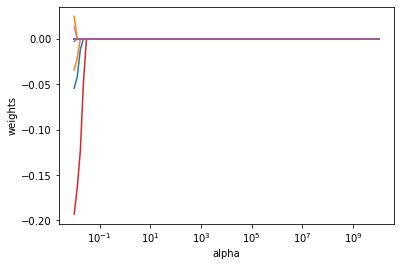

In [130]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [131]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha= lassocv.alpha_)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001075655520258971, max_iter=10000, normalize=True)

In [134]:
pd.Series(lasso.coef_, index= x.columns)

size                                  -0.039424
headFemale                            -0.000000
shareFemale                           -0.057079
shareAgeZeroToFour                    -0.204194
shareAgeFiveToNine                    -0.000000
                                         ...   
withdrawchildrenschool_lackfood_Yes    0.000000
sellanimals:lackfood_Yes              -0.132662
sellfemaleanimal_last_Yes             -0.039199
beg_lackfood_Yes                      -0.000000
share_toilet_Yes                       0.000000
Length: 95, dtype: float64

In [135]:
Y_test_lasso_ur = lasso.predict(x_test)
Y_test_lasso_ur = pd.Series(Y_test_lasso_ur)

In [137]:
Y_test_lasso_ur = pd.DataFrame(Y_test_lasso_ur, columns=['Y Test Lasso'])
Y_test_lasso_ur
Y_test_lasso_ur.reset_index(drop=True, inplace=True)

y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)

In [139]:
#Exclusion Error - Lasso UR

data_lasso_ur = pd.concat([y_test,Y_test_lasso_ur],axis=1)


data_lasso_ur['true percentile'] = data_lasso_ur['log(Total Spend/capita)'].rank(ascending = True)/data_lasso_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_lasso_ur['predicted percentile'] = data_lasso_ur['Y Test Lasso'].rank(ascending = True)/data_lasso_ur['Y Test Lasso'].rank(ascending = True).max()
data_lasso_ur['exclusion error'] = np.nan
data_lasso_ur.loc[data_lasso_ur['true percentile'] <= 0.5, data_lasso_ur['exclusion error']] = 0
data_lasso_ur.loc[((data_lasso_ur['true percentile'] <= 0.5) & (data_lasso_ur['predicted percentile'] > 0.5)), data_lasso_ur['exclusion error']] = 1
data_lasso_ur[np.nan].mean() 

0.2426470588235294

In [140]:
#Inclusion Error - Lasso UR
data_lasso_ur['true percentile'] = data_lasso_ur['log(Total Spend/capita)'].rank(ascending = True)/data_lasso_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_lasso_ur['predicted percentile'] = data_lasso_ur['Y Test Lasso'].rank(ascending = True)/data_lasso_ur['Y Test Lasso'].rank(ascending = True).max()
data_lasso_ur['inclusion error'] = np.nan
data_lasso_ur.loc[data_lasso_ur['predicted percentile'] <= 0.5, data_lasso_ur['inclusion error']] = 0
data_lasso_ur.loc[((data_lasso_ur['predicted percentile'] <= 0.5) & (data_lasso_ur['true percentile'] > 0.5)), data_lasso_ur['inclusion error']] = 1
data_lasso_ur[np.nan].mean() 

0.3905325443786982

In [141]:
#Elastic Net
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [142]:
elastic=ElasticNet(normalize=True, max_iter = 100000)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
        'l1_ratio':[.1,.2,.25,.4,.5,.6,.75,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(x,y)
search.best_params_

{'alpha': 0.001, 'l1_ratio': 0.25}

In [143]:
abs(search.best_score_)

0.5437050159478012

In [144]:
# Elastic Model - Unrestricted Dataset 
e_net= ElasticNet(alpha = 0.01, max_iter = 100000) 
e_net.fit(x_train, y_train) 
  
# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
  
e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

/Users/colleenodonnell/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.19442488744221, tolerance: 0.06044570274257359
  positive)


,Columns,Coefficient Estimate
0,size,-0.071287
1,headFemale,0.000000
2,shareFemale,-0.074586
3,shareAgeZeroToFour,-0.072107
4,shareAgeFiveToNine,-0.000000
...,...,...
90,withdrawchildrenschool_lackfood_Yes,0.000000
91,sellanimals:lackfood_Yes,-0.161589
92,sellfemaleanimal_last_Yes,-0.063143
93,beg_lackfood_Yes,0.000000


In [145]:
Y_test_elastic_ur = pd.Series(y_pred_elastic)

In [146]:
Y_test_elastic_ur = pd.DataFrame(Y_test_elastic_ur, columns=['Y Test Elastic Net'])
Y_test_elastic_ur
Y_test_elastic_ur.reset_index(drop=True, inplace=True)

y_test = pd.DataFrame(y_test, columns=['log(Total Spend/capita)'])
y_test.reset_index()
y_test.reset_index(drop=True, inplace=True)

In [147]:
#exclusion error - elastic net 
data_elastic_ur = pd.concat([y_test,Y_test_elastic_ur],axis=1)


data_elastic_ur['true percentile'] = data_elastic_ur['log(Total Spend/capita)'].rank(ascending = True)/data_elastic_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_elastic_ur['predicted percentile'] = data_elastic_ur['Y Test Elastic Net'].rank(ascending = True)/data_elastic_ur['Y Test Elastic Net'].rank(ascending = True).max()
data_elastic_ur['exclusion error'] = np.nan
data_elastic_ur.loc[data_elastic_ur['true percentile'] <= 0.5, data_elastic_ur['exclusion error']] = 0
data_elastic_ur.loc[((data_elastic_ur['true percentile'] <= 0.5) & (data_elastic_ur['predicted percentile'] > 0.5)), data_elastic_ur['exclusion error']] = 1
data_elastic_ur[np.nan].mean()     

0.25

In [148]:
#inclusion error - elastic net
data_elastic_ur['true percentile'] = data_elastic_ur['log(Total Spend/capita)'].rank(ascending = True)/data_elastic_ur['log(Total Spend/capita)'].rank(ascending = True).max()
data_elastic_ur['predicted percentile'] = data_elastic_ur['Y Test Elastic Net'].rank(ascending = True)/data_elastic_ur['Y Test Elastic Net'].rank(ascending = True).max()
data_elastic_ur['inclusion error'] = np.nan
data_elastic_ur.loc[data_elastic_ur['predicted percentile'] <= 0.5, data_elastic_ur['inclusion error']] = 0
data_elastic_ur.loc[((data_elastic_ur['predicted percentile'] <= 0.5) & (data_elastic_ur['true percentile'] > 0.5)), data_elastic_ur['inclusion error']] = 1
data_elastic_ur[np.nan].mean() 

0.4